In [1]:
!pip install google-cloud-bigquery
!pip install nltk



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import warnings

from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.cloud import bigquery
import pandas as pd

# Initialize BigQuery client
client = bigquery.Client(project='remedi-chatbot')

# List of all tables in your healthcare_datasets dataset
tables = [
    "hospital_readmissions_2024",
    "clinical_outcomes",
    "symptom_description",
    "unplanned_hospital_visits",
    "training_data",
    "pch_hospitals",
    "general_info",
    "symptom_precautions",
    "testing_data"
]

# Loop through each table, fetch data, and display sample
for table in tables:
    print(f"\n🔄 Processing table: {table}")
    table_path = f"remedi-chatbot.healthcare_datasets.{table}"
    
    try:
        # Query to fetch data
        query = f"SELECT * FROM `{table_path}` LIMIT 5"
        df = client.query(query).to_dataframe()
        
        # Display the first few rows of the DataFrame
        print(df.head())
        
    except Exception as e:
        print(f"❌ Error fetching data from {table}: {e}")

print("\n✅ Data extraction completed for all tables.")



🔄 Processing table: hospital_readmissions_2024


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


                     Facility Name  Facility ID State        Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL    READM-30-HF-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   READM-30-AMI-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL    READM-30-PN-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-CABG-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-COPD-HRRP   

  Number of Discharges  Footnote Excess Readmission Ratio  \
0                  616      <NA>                   1.1003   
1                  274      <NA>                   0.9332   
2                  404      <NA>                   0.9871   
3                  126      <NA>                   0.9517   
4                  117      <NA>                   0.9803   

  Predicted Readmission Rate Expected Readmission Rate Number of Readmissions  \
0                    23.1263                   21.0184                    149   
1       

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


   Fiscal Year  Facility ID                     Facility Name  \
0         2024        10006      NORTH ALABAMA MEDICAL CENTER   
1         2024        10039               HUNTSVILLE HOSPITAL   
2         2024        10103  PRINCETON BAPTIST MEDICAL CENTER   
3         2024        20006    MAT-SU REGIONAL MEDICAL CENTER   
4         2024        30023          FLAGSTAFF MEDICAL CENTER   

                          Address   City_Town State  ZIP Code  \
0             1701 VETERANS DRIVE    FLORENCE    AL     35630   
1                   101 SIVLEY RD  HUNTSVILLE    AL     35801   
2  701 PRINCETON AVENUE SOUTHWEST  BIRMINGHAM    AL     35211   
3       2500 SOUTH WOODWORTH LOOP      PALMER    AK     99645   
4        1200 NORTH BEAVER STREET   FLAGSTAFF    AZ     86001   

       County_Parish  MORT-30-AMI Achievement Threshold  \
0         LAUDERDALE                           0.869247   
1            MADISON                           0.869247   
2          JEFFERSON                     

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


   string_field_0                                     string_field_1
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

🔄 Processing table: unplanned_hospital_visits


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


   Facility ID                                    Facility Name  \
0        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
1        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
2        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
3        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
4        50660            USC KENNETH NORRIS JR CANCER HOSPITAL   

          Hospital Type             Address    City_Town State  ZIP Code  \
0  Acute Care Hospitals  1500 E DUARTE ROAD       DUARTE    CA     91010   
1  Acute Care Hospitals  1500 E DUARTE ROAD       DUARTE    CA     91010   
2  Acute Care Hospitals  1500 E DUARTE ROAD       DUARTE    CA     91010   
3  Acute Care Hospitals  1500 E DUARTE ROAD       DUARTE    CA     91010   
4  Acute Care Hospitals   1441 EASTLAKE AVE  LOS ANGELES    CA     90089   

  County_Parish Measure ID                                Measure Description  \
0   LOS ANGELES     PCH-30  Admissions for Patients Receivi

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


   Facility ID                                    Facility Name  \
0        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
1        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
2        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
3        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   
4        50146  CITY OF HOPE HELFORD CLINICAL RESEARCH HOSPITAL   

              Address City_Town State  ZIP Code County_Parish  \
0  1500 E DUARTE ROAD    DUARTE    CA     91010   LOS ANGELES   
1  1500 E DUARTE ROAD    DUARTE    CA     91010   LOS ANGELES   
2  1500 E DUARTE ROAD    DUARTE    CA     91010   LOS ANGELES   
3  1500 E DUARTE ROAD    DUARTE    CA     91010   LOS ANGELES   
4  1500 E DUARTE ROAD    DUARTE    CA     91010   LOS ANGELES   

  Telephone Number      HCAHPS Measure ID  \
0   (626) 359-8111           H_COMP_1_A_P   
1   (626) 359-8111          H_COMP_1_SN_P   
2   (626) 359-8111           H_COMP_1_U_P   
3   (626) 359-8111  H_COMP

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


  Facility ID                                 Facility Name  \
0      011302                              RED BAY HOSPITAL   
1      030136     DIGNITY HEALTH - ARIZONA GENERAL HOSPITAL   
2      050192                      ADVENTIST HEALTH REEDLEY   
3      050697                 PATIENTS' HOSPITAL OF REDDING   
4      061302  COLORADO CANYONS HOSPITAL AND MEDICAL CENTER   

                  Address City_Town State  ZIP Code County_Parish  \
0       211 HOSPITAL ROAD   RED BAY    AL     35582      FRANKLIN   
1  7171 SOUTH 51ST AVENUE    LAVEEN    AZ     85339      MARICOPA   
2       372 W CYPRESS AVE   REEDLEY    CA     93654        FRESNO   
3         2900 EUREKA WAY   REDDING    CA     96001        SHASTA   
4        300 W OTTLEY AVE    FRUITA    CO     81521          MESA   

  Telephone Number              Hospital Type  \
0   (256) 356-9532  Critical Access Hospitals   
1   (623) 584-5100       Acute Care Hospitals   
2   (559) 638-8155       Acute Care Hospitals   
3   (530) 

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


  string_field_0                    string_field_1          string_field_2  \
0   Heart attack                    call ambulance  chew or swallow asprin   
1    Chicken pox              use neem in bathing      consume neem leaves   
2           Acne                        bath twice  avoid fatty spicy food   
3   Hypoglycemia                  lie down on side          check in pulse   
4       Impetigo  soak affected area in warm water         use antibiotics   

                           string_field_3           string_field_4  
0                               keep calm                     None  
1                            take vaccine      avoid public places  
2                   drink plenty of water  avoid too many products  
3                     drink sugary drinks           consult doctor  
4  remove scabs with wet compressed cloth           consult doctor  

🔄 Processing table: testing_data


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

## Top 10 Cities with Most Facilities


In [7]:
top_cities = clinical_outcomes['City_Town'].value_counts().head(10).reset_index()
top_cities.columns = ['City_Town', 'Facility_Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City_Town', y='Facility_Count', palette='Blues_d')
plt.title('Top 10 Cities with Most Facilities')
plt.xlabel('City / Town')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'clinical_outcomes' is not defined

In [8]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

client = bigquery.Client(project='remedi-chatbot')

# Load the training_data table
query = "SELECT * FROM `remedi-chatbot.healthcare_datasets.training_data`"
training_data = client.query(query).to_dataframe()


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


In [9]:
print(training_data.columns)


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


## Top 10 Most Common Symptoms

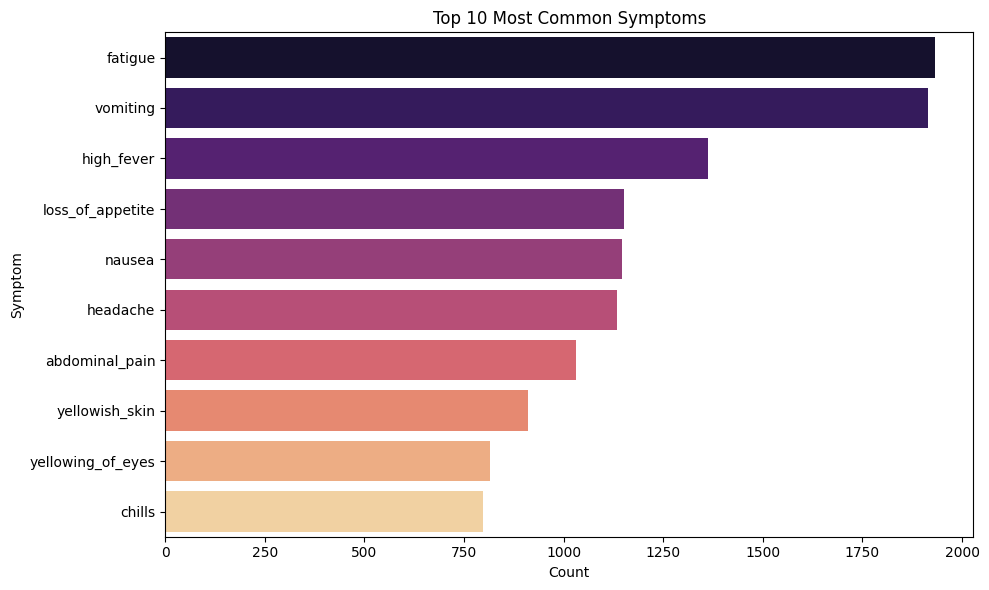

In [10]:
symptom_cols = training_data.columns.drop('prognosis')
symptom_counts = training_data[symptom_cols].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='magma')
plt.title('Top 10 Most Common Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptom')
plt.tight_layout()
plt.show()


## Heatmap of Symptom Correlation

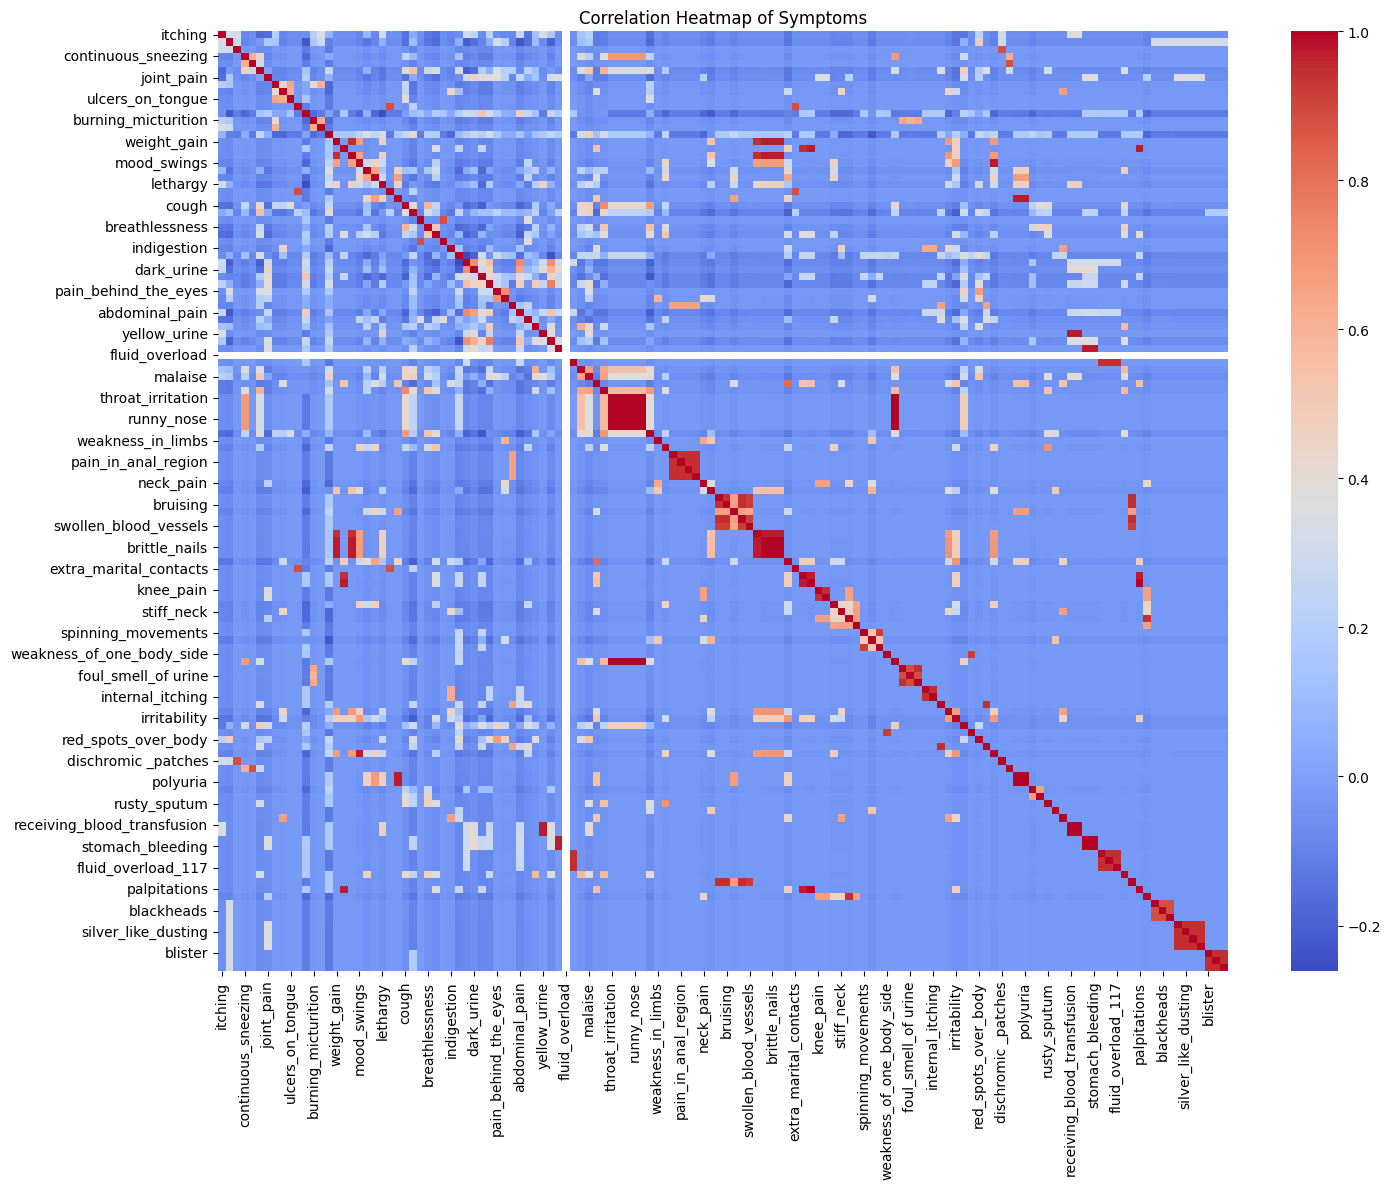

In [11]:
plt.figure(figsize=(15, 12))
# Drop prognosis column for correlation of only symptoms
symptom_corr = training_data.drop('prognosis', axis=1).corr()
sns.heatmap(symptom_corr, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Symptoms')
plt.tight_layout()
plt.show()


In [12]:
from google.cloud import bigquery
client = bigquery.Client(project='remedi-chatbot')

# Define your datasets dictionary
datasets = {
    "hospital_readmissions": "hospital_readmissions_2024",
    "clinical_outcomes": "clinical_outcomes",
    "symptom_description": "symptom_description",
    "unplanned_visits": "unplanned_hospital_visits",
    "training_data": "training_data",
    "pch_hospitals": "pch_hospitals",
    "general_info": "general_info",
    "symptom_precautions": "symptom_precautions",
    "testing_data": "testing_data"
}

# Load all datasets dynamically
dfs = {}
for name, table in datasets.items():
    dfs[name] = client.query(f'SELECT * FROM `remedi-chatbot.healthcare_datasets.{table}`').to_dataframe()

print("✅ All datasets loaded successfully!\n")


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDty

✅ All datasets loaded successfully!



In [13]:
# ML Models
def encode_data(df):
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

models = {}



## Hospital Readmissions - Predict 'Readmitted' column


In [14]:
from sklearn.ensemble import RandomForestRegressor


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

data = dfs['hospital_readmissions'].dropna()

# Encoding categorical columns
def encode_data(df):
    le = LabelEncoder()
    encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        df.loc[:, col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
    return df, encoders

data, encoders = encode_data(data)


# Choose your target column from dataset
target_column = 'Excess Readmission Ratio'  # or 'Predicted Readmission Rate'

if target_column not in data.columns:
    raise ValueError(f"'{target_column}' column missing. Check the dataset columns again.")

X = data.drop(target_column, axis=1)
y = data[target_column]

# Drop date columns before training
X = data.drop([target_column, 'Start Date', 'End Date'], axis=1)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

hr_model = RandomForestRegressor()
hr_model.fit(X_train, y_train)
y_pred = hr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Hospital Readmissions R2 Score: {r2:.2f}")



Hospital Readmissions R2 Score: 1.00


## Clinical Outcomes - Regression model predicting 'Outcome_Score'


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Function to encode categorical data
def encode_data(df):
    le = LabelEncoder()
    encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        df.loc[:, col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
    return df, encoders

# Load your dataset (already in dfs dictionary)
data = dfs['clinical_outcomes'].dropna()

# Optional: Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Select the correct target column (choose one of the *_measure_score columns)
target_column = 'mort-30-ami_measure_score'  # Change this to test other targets

# Check if target exists
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found. Available columns: {data.columns.tolist()}")

# Encode categorical data
data, encoders = encode_data(data)

# Split features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
co_model = LinearRegression()
co_model.fit(X_train, y_train)

# Predictions
y_pred = co_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Clinical Outcomes MSE: {mse:.2f}")
print(f"Clinical Outcomes R2 Score: {r2:.2f}")


Clinical Outcomes MSE: 0.91
Clinical Outcomes R2 Score: 0.95


## Symptom Description - Can use ML to predict 'Disease'


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example: Load the dataset
data = dfs['symptom_description'].dropna()
data.columns = ['Symptoms', 'Disease']

# TF-IDF Vectorization
encoders_dict = {}
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(data['Symptoms'])
encoders_dict['symptom_vectorizer'] = tfidf

print("TF-IDF feature matrix shape:", X.shape)

# User input
user_input = ["chest pain and shortness of breath"]
user_vector = encoders_dict['symptom_vectorizer'].transform(user_input)

# Compute similarity
similarity_scores = cosine_similarity(user_vector, X)

# Find the best match
best_match_index = similarity_scores.argmax()

# Correct access to the 'data' DataFrame
predicted_disease = data.iloc[best_match_index]['Disease']
print("Predicted Disease:", predicted_disease)


TF-IDF feature matrix shape: (41, 55)
Predicted Disease: An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.


## Unplanned Hospital Visits - Predict 'Visit_Type'


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the correct dataset key (Check dfs.keys() if needed)
data = dfs['unplanned_visits'].dropna()

# Encode categorical columns
data, encoders = encode_data(data)


# Set your target column correctly
target_column = 'Rate'  # Confirmed from your dataset columns

# Validate target column exists
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# Drop unnecessary columns + 'Start Date' and 'End Date'
X = data.drop([target_column, 'Facility Name', 'Address', 'City_Town', 'State', 'ZIP Code',
               'Start Date', 'End Date'], axis=1, errors='ignore')
y = data[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
uhv_model = LinearRegression()
uhv_model.fit(X_train, y_train)

# Predict on the test set
y_pred = uhv_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Unplanned Hospital Visits MSE: {mse:.2f}")
print(f"Unplanned Hospital Visits R2 Score: {r2:.2f}")


Unplanned Hospital Visits MSE: 0.00
Unplanned Hospital Visits R2 Score: 1.00


## Training Data - General predictive model (target 'target' assumed)


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = dfs['training_data'].dropna()

# Correct target column
print(df.columns)

# Separate features and target
X = df.drop(columns=['prognosis'])   # 'prognosis' is your actual target
y = df['prognosis']

# Label Encoding target if categorical
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Store label encoder for target
encoders_dict = {}
encoders_dict['target_encoder'] = le_target

# Encode remaining categorical features (if any, mostly symptoms are numeric 0/1)
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders_dict[col] = le

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Store trained model
encoders_dict['trained_model'] = model



Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00  

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['prognosis_encoded'] = le.fit_transform(df['prognosis'])



In [26]:
correlation = df.corr(numeric_only=True)['prognosis_encoded'].sort_values(ascending=False)
print(correlation.head(10))


prognosis_encoded           1.000000
diarrhoea                   0.285993
sweating                    0.261934
bruising                    0.247315
prominent_veins_on_calf     0.247315
swollen_legs                0.247315
cramps                      0.247315
swollen_blood_vessels       0.240568
bladder_discomfort          0.234298
continuous_feel_of_urine    0.234298
Name: prognosis_encoded, dtype: float64


## Symptom Precautions - Predict 'Precaution_Level'


In [27]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project='remedi-chatbot')

query = """
SELECT * FROM `remedi-chatbot.healthcare_datasets.symptom_precautions`
"""

symptom_df = client.query(query).to_dataframe()
print(symptom_df.head())


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


  string_field_0                    string_field_1          string_field_2  \
0   Heart attack                    call ambulance  chew or swallow asprin   
1    Chicken pox              use neem in bathing      consume neem leaves   
2           Acne                        bath twice  avoid fatty spicy food   
3   Hypoglycemia                  lie down on side          check in pulse   
4       Impetigo  soak affected area in warm water         use antibiotics   

                           string_field_3           string_field_4  
0                               keep calm                     None  
1                            take vaccine      avoid public places  
2                   drink plenty of water  avoid too many products  
3                     drink sugary drinks           consult doctor  
4  remove scabs with wet compressed cloth           consult doctor  


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample read (replace with your actual query)
data = symptom_df.copy()

# Create Precaution_Level based on number of non-null precautions
precaution_cols = ['string_field_1', 'string_field_2', 'string_field_3', 'string_field_4']
data['Precaution_Level'] = data[precaution_cols].notnull().sum(axis=1)

# Feature: Disease/Symptom
X = data[['string_field_0']]  # using Disease/Symptom for prediction
y = data['Precaution_Level']

# Encoding the symptom text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X['string_field_0'], y, test_size=0.2, random_state=42)

# NLP Pipeline: TF-IDF + RandomForestClassifier
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english', max_features=500),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Model Accuracy for Precaution_Level prediction: {acc:.2f}")


Model Accuracy for Precaution_Level prediction: 0.89


In [132]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

[[0 1]
 [0 8]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
